<a href="https://colab.research.google.com/github/ipavlopoulos/paremia/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

### Loading the texts

In [11]:
proverbs = pd.read_csv("https://raw.githubusercontent.com/ipavlopoulos/paremia/main/data/balanced_corpus.csv", index_col=0)
proverbs.columns

Index(['text', 'place', 'uri', 'collector', 'area', 'lat', 'lon'], dtype='object')

### Representing the texts with TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_df=0.5, min_df=10, analyzer='char', ngram_range=(2,5))
X = vect.fit_transform(proverbs.text.values)

### Clustering for different number of clusters

In [14]:
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
kappas, scores = list(range(10, 30)), []
models = {}
for k in tqdm(kappas):
    models[k] = KMeans(n_clusters=k, random_state=2023, n_init='auto').fit(X)

  0%|          | 0/20 [00:00<?, ?it/s]

### Assessing the clusterings

In [ ]:
from sklearn.metrics import adjusted_rand_score, v_measure_score, silhouette_score
ars, sil, vms = [], [], []
for k in tqdm(kappas):
    predicted_labels = models[k].predict(X)
    ars.append(adjusted_rand_score(proverbs.area, predicted_labels))
    sil.append(silhouette_score(X, predicted_labels))
    vms.append(v_measure_score(proverbs.area.values, predicted_labels))
evals = pd.DataFrame({'K': kappas, 'Rand Score':ars, 'Silhouette':sil, "V-Score": vms})

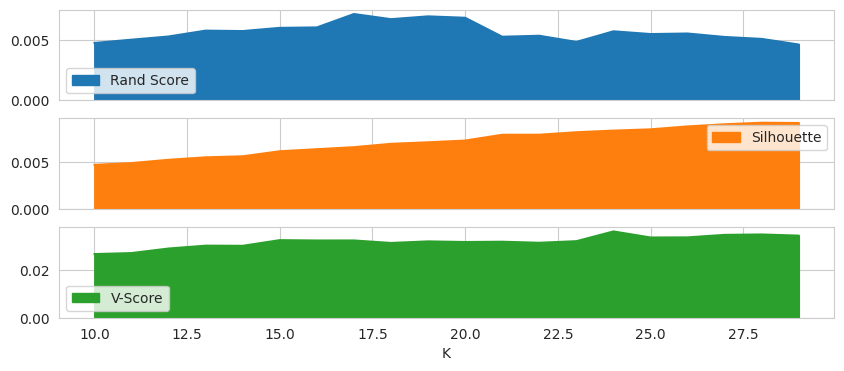

In [39]:
sns.set_style('whitegrid')
ax = evals.plot.area(x='K', figsize=(10,4), subplots=True);